<a href="https://colab.research.google.com/github/sheraphineshovan/Data_Science_Miniprojects/blob/main/DigitRecognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip '/content/digit-recognizer.zip'

Archive:  /content/digit-recognizer.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


# Image loading example

Change the filename within the imread function with your own image

In [ ]:
#import cv2

In [ ]:
#img = cv2.imread('/content/ARS-OM_1314_Ramsey_free_kick_(cropped).jpg')

In [ ]:
#type(img)

In [ ]:
#img.shape

In [ ]:
#img

# Load Images and Libraries

Load all libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Load the data


In [ ]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

In [ ]:
train.shape

(42000, 785)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [ ]:
train.tail()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41999,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
train.skew()

label         0.026479
pixel0        0.000000
pixel1        0.000000
pixel2        0.000000
pixel3        0.000000
               ...    
pixel779    145.149671
pixel780      0.000000
pixel781      0.000000
pixel782      0.000000
pixel783      0.000000
Length: 785, dtype: float64

Plot the image

In [ ]:
#image_data.shape

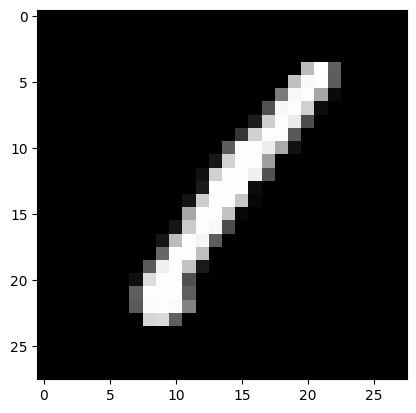

In [ ]:
features = ["pixel{}".format(pixel_num) for pixel_num in range(0,784)]
rows_to_examine = 0
image_data = np.reshape(train[features][rows_to_examine:rows_to_examine+1].to_numpy(), (28,28))
plt.imshow(image_data, cmap = 'gray')

# Model Process

Divide the data into X & Y

In [ ]:
x = train.iloc[:,1:]
y = train['label']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 123)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(33600, 784)
(8400, 784)
(33600,)
(8400,)


Single Layer Perceptron

In [ ]:
slp = Perceptron(verbose = 1)
slp.fit(x_train, y_train)
preds_slp_train = slp.predict(x_train)
preds_slp_test = slp.predict(x_test)

-- Epoch 1
Norm: 33680.40, NNZs: 599, Bias: -92.000000, T: 33600, Avg. loss: 46817.951667
Total training time: 0.06 seconds.
-- Epoch 2
Norm: 42819.49, NNZs: 607, Bias: -161.000000, T: 67200, Avg. loss: 41184.869077
Total training time: 0.12 seconds.
-- Epoch 3
Norm: 48607.75, NNZs: 614, Bias: -222.000000, T: 100800, Avg. loss: 36891.702232
Total training time: 0.17 seconds.
-- Epoch 4
Norm: 54442.08, NNZs: 625, Bias: -281.000000, T: 134400, Avg. loss: 35999.461042
Total training time: 0.23 seconds.
-- Epoch 5
Norm: 58608.01, NNZs: 631, Bias: -333.000000, T: 168000, Avg. loss: 37009.589702
Total training time: 0.29 seconds.
-- Epoch 6
Norm: 61946.25, NNZs: 635, Bias: -383.000000, T: 201600, Avg. loss: 34799.316220
Total training time: 0.35 seconds.
-- Epoch 7
Norm: 65207.63, NNZs: 637, Bias: -432.000000, T: 235200, Avg. loss: 36238.479613
Total training time: 0.40 seconds.
-- Epoch 8
Norm: 68995.89, NNZs: 639, Bias: -476.000000, T: 268800, Avg. loss: 34062.205625
Total training time: 0

In [ ]:
def model_eval(actual, predicted):
  acc_score = accuracy_score(actual, predicted)
  conf_matrix = confusion_matrix(actual, predicted)
  clas_rep = classification_report(actual, predicted)
  print('Model Accuracy is: ', round(acc_score, 2))
  print(conf_matrix)
  print(clas_rep)

In [ ]:
model_eval(y_train, preds_slp_train)

Model Accuracy is:  0.89
[[3197    0   14    5    2   31   70    1   25    2]
 [   1 3556   20    9    2    5    4    4  130    4]
 [  18    9 2961   70    9   24   34   16  193    5]
 [  19   10   83 3022    1  142   27   16  152   21]
 [   5    8  123   17 2912   19   38   17  103   34]
 [  27    3   16   78   19 2525   96    7  194   30]
 [  13    5   28    3    5   45 3122    0   46    0]
 [   7    6  134   17    7    7    6 3269   40   48]
 [  18   20   38   53    8   92   17   10 2978   12]
 [  19   15  120   63  188  119    8  298  309 2222]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      3347
           1       0.98      0.95      0.97      3735
           2       0.84      0.89      0.86      3339
           3       0.91      0.87      0.88      3493
           4       0.92      0.89      0.91      3276
           5       0.84      0.84      0.84      2995
           6       0.91      0.96      0.93      3267
           

In [ ]:
model_eval(y_test, preds_slp_test)

Model Accuracy is:  0.87
[[741   1   4   0   0  10  22   0   7   0]
 [  0 895   8   6   1   3   2   0  34   0]
 [  4   3 710  28   2   9  18   4  59   1]
 [  6   2  23 742   2  38   4   5  28   8]
 [  5   6  33   2 689   2  12   6  28  13]
 [ 12   5   4  38   3 654  21   1  58   4]
 [  3   1  12   0   0  18 823   1  12   0]
 [  4   5  32   1   2   6   0 781  15  14]
 [  6  11  15   8   2  25  10   5 732   3]
 [  5   2  37  14  62  30   0  85  82 510]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       785
           1       0.96      0.94      0.95       949
           2       0.81      0.85      0.83       838
           3       0.88      0.86      0.87       858
           4       0.90      0.87      0.88       796
           5       0.82      0.82      0.82       800
           6       0.90      0.95      0.92       870
           7       0.88      0.91      0.89       860
           8       0.69      0.90      0.78       817
   

Multi Layer Perceptron

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes = (128,128,128), verbose = 1, max_iter = 250)

In [ ]:
mlp.fit(x_train, y_train)
preds_mlp_train = mlp.predict(x_train)
preds_mlp_test = mlp.predict(x_test)

Iteration 1, loss = 2.28091253
Iteration 2, loss = 0.46565164
Iteration 3, loss = 0.26194056
Iteration 4, loss = 0.17404005
Iteration 5, loss = 0.12347962
Iteration 6, loss = 0.09167123
Iteration 7, loss = 0.07917860
Iteration 8, loss = 0.06576407
Iteration 9, loss = 0.06414340
Iteration 10, loss = 0.05451088
Iteration 11, loss = 0.05512685
Iteration 12, loss = 0.05341747
Iteration 13, loss = 0.06085914
Iteration 14, loss = 0.06360718
Iteration 15, loss = 0.07444158
Iteration 16, loss = 0.08447407
Iteration 17, loss = 0.05883942
Iteration 18, loss = 0.04407537
Iteration 19, loss = 0.04835961
Iteration 20, loss = 0.06952901
Iteration 21, loss = 0.05906397
Iteration 22, loss = 0.05482795


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


In [ ]:
model_eval(y_train, preds_mlp_train)

Model Accuracy is:  0.99
[[3336    0    2    0    1    0    6    0    1    1]
 [   1 3711    5    2    0    0    3    5    4    4]
 [   1    0 3329    6    0    0    2    1    0    0]
 [   1    1    4 3466    2    6    0    2    6    5]
 [   0    0    0    1 3191    1    2    1    8   72]
 [   1    0    2   22    0 2946    0    1   19    4]
 [   0    0    1    0    0    3 3257    0    6    0]
 [   1    1   33    2    3    1    0 3490    0   10]
 [   0    4    6   10    0    3    0    0 3214    9]
 [   2    0    7   16    1    3    0   15   10 3307]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3347
           1       1.00      0.99      1.00      3735
           2       0.98      1.00      0.99      3339
           3       0.98      0.99      0.99      3493
           4       1.00      0.97      0.99      3276
           5       0.99      0.98      0.99      2995
           6       1.00      1.00      1.00      3267
           

In [ ]:
model_eval(preds_mlp_test, y_test)

Model Accuracy is:  0.96
[[773   0   1   0   1   0   3   2   3   3]
 [  0 929   2   2   0   1   1   1   7   0]
 [  4   7 810  13   3   6   0  16   7   6]
 [  0   4  10 824   0  21   0   2   6   8]
 [  1   0   2   0 740   1   1   2   2   9]
 [  0   0   0   7   1 751   5   2   6   4]
 [  4   2   3   0   1   3 855   0   2   1]
 [  0   1   4   4   3   0   0 827   2  15]
 [  2   4   4   4   6  12   5   1 776   8]
 [  1   2   2   4  41   5   0   7   6 773]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       786
           1       0.98      0.99      0.98       943
           2       0.97      0.93      0.95       872
           3       0.96      0.94      0.95       875
           4       0.93      0.98      0.95       758
           5       0.94      0.97      0.95       776
           6       0.98      0.98      0.98       871
           7       0.96      0.97      0.96       856
           8       0.95      0.94      0.95       822
   

# Implementation using TensorFlow

Load the TensorFlow Libraries

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD, Adam
from keras.losses import CategoricalCrossentropy
from tensorflow.keras.utils import to_categorical

Declare the model: Sequential or Functional

In [ ]:
model = Sequential()

Declare the Layers: Dense

In [ ]:
model.add(Dense(512, activation = 'relu', input_dim = 784))
model.add(Dropout(0.2))
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation = 'softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                5

Compile the model

In [ ]:
model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics =['accuracy'])

Fit the model

In [ ]:
y_train_ohe = to_categorical(y_train)
y_test_ohe = to_categorical(y_test)

In [ ]:
print(y_train.shape)
print(y_train_ohe.shape)

(33600,)
(33600, 10)


In [ ]:
y_train_ohe

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [ ]:
y_train

40572    2
20883    9
3479     2
34084    1
2067     5
        ..
7763     0
15377    7
17730    9
28030    6
15725    7
Name: label, Length: 33600, dtype: int64

In [ ]:
hist = model.fit(x_train, y_train_ohe,validation_data = (x_test, y_test_ohe), epochs = 50, batch_size = 64, verbose = 2)

Epoch 1/50
525/525 - 10s - loss: 0.2371 - accuracy: 0.9326 - val_loss: 0.1690 - val_accuracy: 0.9539 - 10s/epoch - 19ms/step
Epoch 2/50
525/525 - 10s - loss: 0.2038 - accuracy: 0.9427 - val_loss: 0.1689 - val_accuracy: 0.9535 - 10s/epoch - 19ms/step
Epoch 3/50
525/525 - 10s - loss: 0.1976 - accuracy: 0.9458 - val_loss: 0.1399 - val_accuracy: 0.9624 - 10s/epoch - 18ms/step
Epoch 4/50
525/525 - 9s - loss: 0.1754 - accuracy: 0.9495 - val_loss: 0.1728 - val_accuracy: 0.9563 - 9s/epoch - 16ms/step
Epoch 5/50
525/525 - 9s - loss: 0.1759 - accuracy: 0.9506 - val_loss: 0.1734 - val_accuracy: 0.9596 - 9s/epoch - 18ms/step
Epoch 6/50
525/525 - 10s - loss: 0.1812 - accuracy: 0.9518 - val_loss: 0.1654 - val_accuracy: 0.9577 - 10s/epoch - 18ms/step
Epoch 7/50
525/525 - 10s - loss: 0.1788 - accuracy: 0.9525 - val_loss: 0.1732 - val_accuracy: 0.9614 - 10s/epoch - 19ms/step
Epoch 8/50
525/525 - 10s - loss: 0.1644 - accuracy: 0.9560 - val_loss: 0.2016 - val_accuracy: 0.9563 - 10s/epoch - 18ms/step
Epoc

<function matplotlib.pyplot.show(close=None, block=None)>

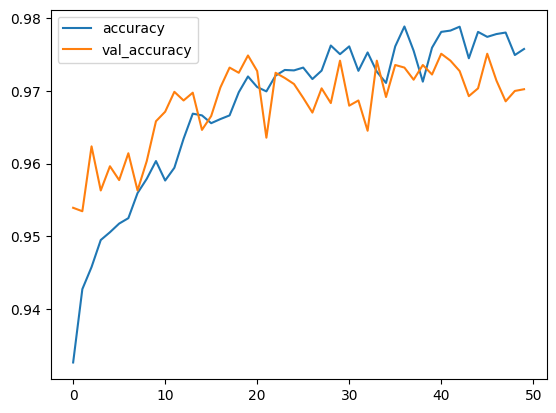

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.show

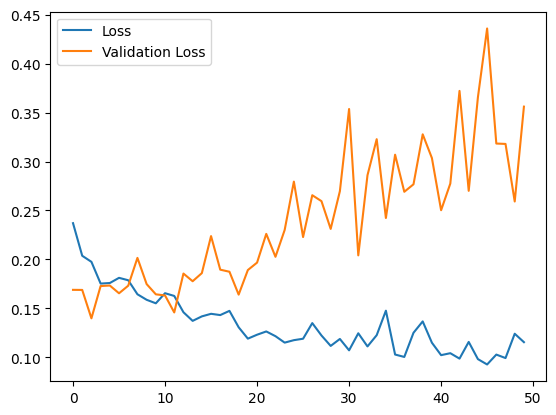

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['Loss', 'Validation Loss'])
plt.show()

In [ ]:
preds_y_train = model.predict(x_train)

1050/1050 [==============================] - 4s 4ms/step


In [ ]:
preds_y_train[1]

array([6.8766833e-34, 2.9763441e-27, 1.7555604e-18, 9.5171382e-10,
       9.0015334e-08, 1.4282742e-17, 0.0000000e+00, 9.4473401e-11,
       2.1092299e-14, 9.9999982e-01], dtype=float32)

In [ ]:
y_train

40572    2
20883    9
3479     2
34084    1
2067     5
        ..
7763     0
15377    7
17730    9
28030    6
15725    7
Name: label, Length: 33600, dtype: int64

In [ ]:
np.argmax(preds_y_train[1], axis = 0)

9

In [ ]:
preds_y_train_class = np.argmax(preds_y_train, axis = 1)

In [ ]:
preds_y_train_class

array([2, 9, 2, ..., 9, 6, 7])

In [ ]:
model_eval(y_train, preds_y_train_class)

Model Accuracy is:  0.99
[[3330    0    0    1    0    0    1    0   14    1]
 [   0 3718    0    1    2    0    0    1   12    1]
 [   4    0 3317   11    0    0    0    1    6    0]
 [   0    0    3 3472    0    1    0    0   16    1]
 [   8    0    2    0 3260    0    0    1    3    2]
 [   0    0    0   13    0 2971    7    0    4    0]
 [  29    0    0    0    1    2 3193    0   42    0]
 [   0    2    2    0    1    1    0 3526    3    6]
 [   3    0    4    9    0    3    1    0 3225    1]
 [   3    0    0    5   19    2    0    0   20 3312]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3347
           1       1.00      1.00      1.00      3735
           2       1.00      0.99      1.00      3339
           3       0.99      0.99      0.99      3493
           4       0.99      1.00      0.99      3276
           5       1.00      0.99      0.99      2995
           6       1.00      0.98      0.99      3267
           

In [ ]:
preds_ytest_class = np.argmax(model.predict(x_test), axis = 1)

263/263 [==============================] - 2s 7ms/step


In [ ]:
model_eval(y_test, preds_ytest_class)

Model Accuracy is:  0.97
[[776   0   1   0   0   1   1   0   6   0]
 [  0 929   3   3   2   2   1   1   8   0]
 [  1   2 815   9   0   0   0   4   6   1]
 [  0   0   6 842   0   2   0   3   4   1]
 [  7   2   1   0 777   0   1   2   3   3]
 [  2   1   2  15   1 770   4   0   3   2]
 [ 11   1   0   0   1   3 837   0  16   1]
 [  2   3   6   1   3   1   0 837   2   5]
 [  3   3   1   6   1   3   1   2 793   4]
 [  4   1   0   6  20   6   0   6  10 774]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       785
           1       0.99      0.98      0.98       949
           2       0.98      0.97      0.97       838
           3       0.95      0.98      0.97       858
           4       0.97      0.98      0.97       796
           5       0.98      0.96      0.97       800
           6       0.99      0.96      0.98       870
           7       0.98      0.97      0.98       860
           8       0.93      0.97      0.95       817
   